In [1]:
# import des biblio
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
import nltk
from sklearn import manifold, decomposition
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

In [2]:
df=pd.read_csv("exemple_essai/Flipkart/flipkart_com-ecommerce_sample_1050.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050 entries, 0 to 1049
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   uniq_id                  1050 non-null   object 
 1   crawl_timestamp          1050 non-null   object 
 2   product_url              1050 non-null   object 
 3   product_name             1050 non-null   object 
 4   product_category_tree    1050 non-null   object 
 5   pid                      1050 non-null   object 
 6   retail_price             1049 non-null   float64
 7   discounted_price         1049 non-null   float64
 8   image                    1050 non-null   object 
 9   is_FK_Advantage_product  1050 non-null   bool   
 10  description              1050 non-null   object 
 11  product_rating           1050 non-null   object 
 12  overall_rating           1050 non-null   object 
 13  brand                    712 non-null    object 
 14  product_specifications  

In [4]:
df.shape

(1050, 15)

In [5]:
df.head(5)

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
0,55b85ea15a1536d46b7190ad6fff8ce7,2016-04-30 03:22:56 +0000,http://www.flipkart.com/elegance-polyester-mul...,Elegance Polyester Multicolor Abstract Eyelet ...,"[""Home Furnishing >> Curtains & Accessories >>...",CRNEG7BKMFFYHQ8Z,1899.0,899.0,55b85ea15a1536d46b7190ad6fff8ce7.jpg,False,Key Features of Elegance Polyester Multicolor ...,No rating available,No rating available,Elegance,"{""product_specification""=>[{""key""=>""Brand"", ""v..."
1,7b72c92c2f6c40268628ec5f14c6d590,2016-04-30 03:22:56 +0000,http://www.flipkart.com/sathiyas-cotton-bath-t...,Sathiyas Cotton Bath Towel,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEGFZHGBXPHZUH,600.0,449.0,7b72c92c2f6c40268628ec5f14c6d590.jpg,False,Specifications of Sathiyas Cotton Bath Towel (...,No rating available,No rating available,Sathiyas,"{""product_specification""=>[{""key""=>""Machine Wa..."
2,64d5d4a258243731dc7bbb1eef49ad74,2016-04-30 03:22:56 +0000,http://www.flipkart.com/eurospa-cotton-terry-f...,Eurospa Cotton Terry Face Towel Set,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEG6SHXTDB2A2Y,NaN,NaN,64d5d4a258243731dc7bbb1eef49ad74.jpg,False,Key Features of Eurospa Cotton Terry Face Towe...,No rating available,No rating available,Eurospa,"{""product_specification""=>[{""key""=>""Material"",..."
3,d4684dcdc759dd9cdf41504698d737d8,2016-06-20 08:49:52 +0000,http://www.flipkart.com/santosh-royal-fashion-...,SANTOSH ROYAL FASHION Cotton Printed King size...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",BDSEJT9UQWHDUBH4,2699.0,1299.0,d4684dcdc759dd9cdf41504698d737d8.jpg,False,Key Features of SANTOSH ROYAL FASHION Cotton P...,No rating available,No rating available,SANTOSH ROYAL FASHION,"{""product_specification""=>[{""key""=>""Brand"", ""v..."
4,6325b6870c54cd47be6ebfbffa620ec7,2016-06-20 08:49:52 +0000,http://www.flipkart.com/jaipur-print-cotton-fl...,Jaipur Print Cotton Floral King sized Double B...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",BDSEJTHNGWVGWWQU,2599.0,698.0,6325b6870c54cd47be6ebfbffa620ec7.jpg,False,Key Features of Jaipur Print Cotton Floral Kin...,No rating available,No rating available,Jaipur Print,"{""product_specification""=>[{""key""=>""Machine Wa..."


In [6]:
# valeurs nulles 
df.isna().mean()

uniq_id                    0.000000
crawl_timestamp            0.000000
product_url                0.000000
product_name               0.000000
product_category_tree      0.000000
pid                        0.000000
retail_price               0.000952
discounted_price           0.000952
image                      0.000000
is_FK_Advantage_product    0.000000
description                0.000000
product_rating             0.000000
overall_rating             0.000000
brand                      0.321905
product_specifications     0.000952
dtype: float64

In [7]:
df=df[['uniq_id','product_name','image','description','product_category_tree']]

In [8]:
df

,uniq_id,product_name,image,description,product_category_tree
0,55b85ea15a1536d46b7190ad6fff8ce7,Elegance Polyester Multicolor Abstract Eyelet ...,55b85ea15a1536d46b7190ad6fff8ce7.jpg,Key Features of Elegance Polyester Multicolor ...,"[""Home Furnishing >> Curtains & Accessories >>..."
1,7b72c92c2f6c40268628ec5f14c6d590,Sathiyas Cotton Bath Towel,7b72c92c2f6c40268628ec5f14c6d590.jpg,Specifications of Sathiyas Cotton Bath Towel (...,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T..."
2,64d5d4a258243731dc7bbb1eef49ad74,Eurospa Cotton Terry Face Towel Set,64d5d4a258243731dc7bbb1eef49ad74.jpg,Key Features of Eurospa Cotton Terry Face Towe...,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T..."
3,d4684dcdc759dd9cdf41504698d737d8,SANTOSH ROYAL FASHION Cotton Printed King size...,d4684dcdc759dd9cdf41504698d737d8.jpg,Key Features of SANTOSH ROYAL FASHION Cotton P...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>..."
4,6325b6870c54cd47be6ebfbffa620ec7,Jaipur Print Cotton Floral King sized Double B...,6325b6870c54cd47be6ebfbffa620ec7.jpg,Key Features of Jaipur Print Cotton Floral Kin...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>..."
...,...,...,...,...,...
1045,958f54f4c46b53c8a0a9b8167d9140bc,Oren Empower Extra Large Self Adhesive Sticker,958f54f4c46b53c8a0a9b8167d9140bc.jpg,Oren Empower Extra Large Self Adhesive Sticker...,"[""Baby Care >> Baby & Kids Gifts >> Stickers >..."
1046,fd6cbcc22efb6b761bd564c28928483c,Wallmantra Large Vinyl Sticker Sticker,fd6cbcc22efb6b761bd564c28928483c.jpg,Wallmantra Large Vinyl Sticker Sticker (Pack o...,"[""Baby Care >> Baby & Kids Gifts >> Stickers >..."
1047,5912e037d12774bb73a2048f35a00009,Uberlyfe Extra Large Pigmented Polyvinyl Films...,5912e037d12774bb73a2048f35a00009.jpg,Buy Uberlyfe Extra Large Pigmented Polyvinyl F...,"[""Baby Care >> Baby & Kids Gifts >> Stickers >..."
1048,c3edc504d1b4f0ba6224fa53a43a7ad6,Wallmantra Medium Vinyl Sticker Sticker,c3edc504d1b4f0ba6224fa53a43a7ad6.jpg,Buy Wallmantra Medium Vinyl Sticker Sticker fo...,"[""Baby Care >> Baby & Kids Gifts >> Stickers >..."


In [9]:
# detection des valeurs nulles
df.isna().mean()

uniq_id                  0.0
product_name             0.0
image                    0.0
description              0.0
product_category_tree    0.0
dtype: float64

In [10]:
df.describe()

,uniq_id,product_name,image,description,product_category_tree
count,1050,1050,1050,1050,1050
unique,1050,1050,1050,1050,642
top,55b85ea15a1536d46b7190ad6fff8ce7,Elegance Polyester Multicolor Abstract Eyelet ...,55b85ea15a1536d46b7190ad6fff8ce7.jpg,Key Features of Elegance Polyester Multicolor ...,"[""Home Furnishing >> Bed Linen >> Blankets, Qu..."
freq,1,1,1,1,56


In [11]:
df.sample(20)

,uniq_id,product_name,image,description,product_category_tree
309,2f40e01331bc00216d147d4ebfdfbaf3,Infinity India Antique Gemstone Brass Surahi H...,2f40e01331bc00216d147d4ebfdfbaf3.jpg,Buy Infinity India Antique Gemstone Brass Sura...,"[""Home Decor & Festive Needs >> Showpieces >> ..."
1012,29def171d7e31d48571a52f0fb3e6b07,Ech oly Ceramic Inside Fitting Hookah Mouth Tip,29def171d7e31d48571a52f0fb3e6b07.jpg,Ech oly Ceramic Inside Fitting Hookah Mouth Ti...,"[""Home Decor & Festive Needs >> Table Decor & ..."
898,4b03cdfc7d1135c972e5c620dd7da66c,KDS SURGICAL Tripod Walking Stick,4b03cdfc7d1135c972e5c620dd7da66c.jpg,Specifications of KDS SURGICAL Tripod Walking ...,"[""Beauty and Personal Care >> Health Care >> H..."
622,672d1c3272eae4586eb5994fe408c12a,Mee Mee Multifunctional Nursery Diaper Bag,672d1c3272eae4586eb5994fe408c12a.jpg,Mee Mee Multifunctional Nursery Diaper Bag (Da...,"[""Baby Care >> Diapering & Potty Training >> D..."
459,4e09d5a71d46d61de3d4c9c5aedb73f2,TIGI BED HEAD COLOUR GODDESS OIL INFUSED CONDI...,4e09d5a71d46d61de3d4c9c5aedb73f2.jpg,Key Features of TIGI BED HEAD COLOUR GODDESS O...,"[""Beauty and Personal Care >> Hair Care >> Con..."
806,9c06a95a82c3bd6635b9fe6e92b15902,Mxofere Combo Papaya Mixfruit Almond Honey Ora...,9c06a95a82c3bd6635b9fe6e92b15902.jpg,Buy Mxofere Combo Papaya Mixfruit Almond Honey...,"[""Beauty and Personal Care >> Combos and Kits ..."
48,e7cab08a267e815c72a26513222783e0,AKUP league-of-legends Ceramic Mug,e7cab08a267e815c72a26513222783e0.jpg,Key Features of AKUP league-of-legends Ceramic...,"[""Kitchen & Dining >> Coffee Mugs >> AKUP Coff..."
543,d98fac46793639eceaaa2e74cadd4973,Sonata 7052YM07 Watch,d98fac46793639eceaaa2e74cadd4973.jpg,Sonata 7052YM07 Watch - Buy Sonata 7052YM07 Wa...,"[""Watches >> Wrist Watches >> Sonata Wrist Wat..."
1038,7821fb1cbf8d3bb294c3c20527119f15,"Surgical e Sstudio S0004 Gown, Pant Hospital S...",7821fb1cbf8d3bb294c3c20527119f15.jpg,"Key Features of Surgical e Sstudio S0004 Gown,...","[""Beauty and Personal Care >> Health Care >> M..."
640,6d460d2e12ff7c84cb6b9af783d465ae,NammaBaby Baby Girl's Animal Print Top & Pyjam...,6d460d2e12ff7c84cb6b9af783d465ae.jpg,Specifications of NammaBaby Baby Girl's Animal...,"[""Baby Care >> Infant Wear >> Baby Girls' Clot..."


In [12]:
# valeurs dupliquéés
df.duplicated().sum()

0

In [13]:
df['product_category_tree'].describe()

count                                                  1050
unique                                                  642
top       ["Home Furnishing >> Bed Linen >> Blankets, Qu...
freq                                                     56
Name: product_category_tree, dtype: object

# la  variable category

In [14]:
# Fonction pour extraire la catégorie
def extract_category(row):
    pos = str(row['product_category_tree']).find(">>")
    return str(row['product_category_tree'])[:pos]

# Appliquer la fonction à chaque ligne du DataFrame
df['category'] = df.apply(extract_category, axis=1)
df['category'] = df['category'].str[2:]

In [15]:
df.category.describe()

count                 1050
unique                   7
top       Home Furnishing 
freq                   150
Name: category, dtype: object

In [16]:
# les categories 
df.category.unique()

array(['Home Furnishing ', 'Baby Care ', 'Watches ',
       'Home Decor & Festive Needs ', 'Kitchen & Dining ',
       'Beauty and Personal Care ', 'Computers '], dtype=object)

# la  variable description

In [17]:
df['description']

0       Key Features of Elegance Polyester Multicolor ...
1       Specifications of Sathiyas Cotton Bath Towel (...
2       Key Features of Eurospa Cotton Terry Face Towe...
3       Key Features of SANTOSH ROYAL FASHION Cotton P...
4       Key Features of Jaipur Print Cotton Floral Kin...
                              ...                        
1045    Oren Empower Extra Large Self Adhesive Sticker...
1046    Wallmantra Large Vinyl Sticker Sticker (Pack o...
1047    Buy Uberlyfe Extra Large Pigmented Polyvinyl F...
1048    Buy Wallmantra Medium Vinyl Sticker Sticker fo...
1049    Buy Uberlyfe Large Vinyl Sticker for Rs.595 on...
Name: description, Length: 1050, dtype: object

In [18]:
df['description'].describe()

count                                                  1050
unique                                                 1050
top       Key Features of Elegance Polyester Multicolor ...
freq                                                      1
Name: description, dtype: object

In [19]:
df['description'].head(5)

0    Key Features of Elegance Polyester Multicolor ...
1    Specifications of Sathiyas Cotton Bath Towel (...
2    Key Features of Eurospa Cotton Terry Face Towe...
3    Key Features of SANTOSH ROYAL FASHION Cotton P...
4    Key Features of Jaipur Print Cotton Floral Kin...
Name: description, dtype: object

In [20]:
df['description'].tail(5)

1045    Oren Empower Extra Large Self Adhesive Sticker...
1046    Wallmantra Large Vinyl Sticker Sticker (Pack o...
1047    Buy Uberlyfe Extra Large Pigmented Polyvinyl F...
1048    Buy Wallmantra Medium Vinyl Sticker Sticker fo...
1049    Buy Uberlyfe Large Vinyl Sticker for Rs.595 on...
Name: description, dtype: object

In [21]:
df['description'].sample(5)

423    Key Features of YGS Keyboard Case for Asus Mem...
200    MA Design Hut Showpiece  -  8 cm (Brass, Yello...
348    Buy Zyxel 3D 1440 - 3G Data Card only for Rs. ...
578    Timewel 1100-N1949_B Analog Watch  - For Women...
998    Key Features of Happiness Is Printed Bone Chin...
Name: description, dtype: object

# la  variable product_name

In [22]:
df['product_name']

0       Elegance Polyester Multicolor Abstract Eyelet ...
1                              Sathiyas Cotton Bath Towel
2                     Eurospa Cotton Terry Face Towel Set
3       SANTOSH ROYAL FASHION Cotton Printed King size...
4       Jaipur Print Cotton Floral King sized Double B...
                              ...                        
1045       Oren Empower Extra Large Self Adhesive Sticker
1046               Wallmantra Large Vinyl Sticker Sticker
1047    Uberlyfe Extra Large Pigmented Polyvinyl Films...
1048              Wallmantra Medium Vinyl Sticker Sticker
1049                         Uberlyfe Large Vinyl Sticker
Name: product_name, Length: 1050, dtype: object

In [23]:
df['product_name'].describe()

count                                                  1050
unique                                                 1050
top       Elegance Polyester Multicolor Abstract Eyelet ...
freq                                                      1
Name: product_name, dtype: object

In [24]:
df['product_name'].head(5)

0    Elegance Polyester Multicolor Abstract Eyelet ...
1                           Sathiyas Cotton Bath Towel
2                  Eurospa Cotton Terry Face Towel Set
3    SANTOSH ROYAL FASHION Cotton Printed King size...
4    Jaipur Print Cotton Floral King sized Double B...
Name: product_name, dtype: object

In [25]:
df['product_name'].tail(5)

1045       Oren Empower Extra Large Self Adhesive Sticker
1046               Wallmantra Large Vinyl Sticker Sticker
1047    Uberlyfe Extra Large Pigmented Polyvinyl Films...
1048              Wallmantra Medium Vinyl Sticker Sticker
1049                         Uberlyfe Large Vinyl Sticker
Name: product_name, dtype: object

In [26]:
df['product_name'].sample(5)

312                                          Intex W150D
734    Radhika's World of Crafts Ganesha with Prabhav...
168                        Printland PMR1464 Ceramic Mug
965              NYX Set Of 2 Soft Matte Lip Cream 06,22
764    Chappin & Nellson CNL-50-White-RG Analog Watch...
Name: product_name, dtype: object

# Nettoyage  du texte 

In [27]:
# Tokenizer
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk import FreqDist

def tokenizer_fct(sentence) :
    # print(sentence)
    sentence_clean = sentence.replace('.', ' ')
    word_tokens = word_tokenize(sentence_clean)
    return word_tokens

# Stop words
from nltk.corpus import stopwords
stop_w = list(set(stopwords.words('english'))) + ['[', ']', ',', '.', ':', '?', '(', ')']

def stop_word_filter_fct(list_words) :
    filtered_w = [w for w in list_words if not w in stop_w]
    filtered_w2 = [w for w in filtered_w if len(w) > 2]
    return filtered_w2

# lower case et alpha
def lower_fct(list_words) :
    lw = [w.lower() for w in list_words ]
    return lw

# Lemmatizer (base d'un mot)
from nltk.stem import WordNetLemmatizer

def lemma_fct(list_words) :
    lemmatizer = WordNetLemmatizer()
    lem_w = [lemmatizer.lemmatize(w) for w in list_words]
    return lem_w

# Fonction de préparation du texte pour le bag of words (Countvectorizer et Tf_idf, Word2Vec)
def transform_bow_fct(desc_text) :
    word_tokens = tokenizer_fct(desc_text)
    sw = stop_word_filter_fct(word_tokens)
    lw = lower_fct(sw)
    # lem_w = lemma_fct(lw)    
    transf_desc_text = ' '.join(lw)
    return transf_desc_text

# Fonction de préparation du texte pour le bag of words avec lemmatization
def transform_bow_lem_fct(desc_text) :
    word_tokens = tokenizer_fct(desc_text)
    sw = stop_word_filter_fct(word_tokens)
    lw = lower_fct(sw)
    lem_w = lemma_fct(lw)    
    transf_desc_text = ' '.join(lem_w)
    return transf_desc_text

# Fonction de préparation du texte pour le Deep learning (USE et BERT)
def transform_dl_fct(desc_text) :
    word_tokens = tokenizer_fct(desc_text)
#    sw = stop_word_filter_fct(word_tokens)
    lw = lower_fct(word_tokens)
    # lem_w = lemma_fct(lw)    
    transf_desc_text = ' '.join(lw)
    return transf_desc_text

def mots_plus_freq(var_text):
    freq_distribution = FreqDist(var_text)
    df_freq = pd.DataFrame(list(freq_distribution.items()), columns=['Terme', 'Fréquence'])
    df_freq = df_freq.sort_values(by='Fréquence', ascending=False)
    return df_freq


## application de nettoyage sur la variable description 

In [28]:

df['des_sentence_bow'] = df['description'].apply(lambda x : transform_bow_fct(x))
df['des_sentence_bow_lem'] = df['description'].apply(lambda x : transform_bow_lem_fct(x))
df['des_sentence_dl'] = df['description'].apply(lambda x : transform_dl_fct(x))


## application des fonctions de nettoyage sur la variable product_name

In [29]:

df['name_sentence_bow'] = df['product_name'].apply(lambda x : transform_bow_fct(x))
df['name_sentence_bow_lem'] = df['product_name'].apply(lambda x : transform_bow_lem_fct(x))
df['name_sentence_dl'] = df['product_name'].apply(lambda x : transform_dl_fct(x))

## concatenation de  deux variables description et product_name

In [30]:

df['des_name']=df['des_sentence_dl']+df['name_sentence_dl']
df['des_name_trans']=df['description']+df['product_name']
df['des_name_trans']=df['des_name_trans'].apply(lambda x : transform_bow_lem_fct(x))

In [31]:
# creation fichier csv 
df.to_csv("data_product_name.csv")

In [32]:
#  les mots les plus frequents pour les deux variables 

In [34]:
print(mots_plus_freq(df['name_sentence_bow_lem']))

                                                  Terme  Fréquence
57    rythmx nail polish black lipstick important combo          3
429                     reiki crystal product showpiece          2
329                                               tenda          2
969           dongli striped baby boy polo neck t-shirt          2
1032            wallmantra medium vinyl sticker sticker          2
...                                                 ...        ...
355   vincent valentine paris set new dark dark fire...          1
356                    aero care ice blue men combo set          1
357                                         tenda fh330          1
358      beverly hill polo club blue gift set combo set          1
1036                       uberlyfe large vinyl sticker          1

[1037 rows x 2 columns]


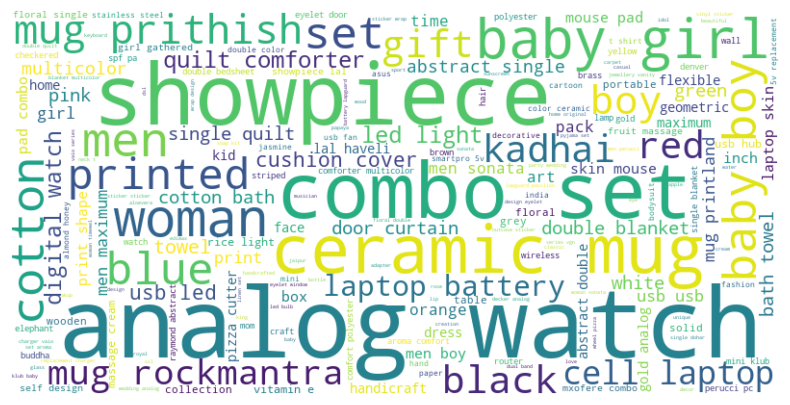

In [35]:
#variable product_name
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=400, max_words=200, background_color='white').generate(' '.join(df['name_sentence_bow_lem']))
# Affichage du wordcloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [36]:
print(mots_plus_freq(df['des_sentence_bow_lem']))

                                                  Terme  Fréquence
57    specification rythmx nail polish black lipstic...          2
144   buy prithish abstract design ceramic mug 175 o...          2
0     key feature elegance polyester multicolor abst...          1
702   buy home original abstract abstract double bla...          1
701   sapatos plain single dohar fushia piece brown ...          1
...                                                 ...        ...
355   flipkart com buy yardley jasmine lace satin co...          1
356   flipkart com buy spinz combo set online 354 fl...          1
357   flipkart com buy park avenue believe spray fou...          1
358   flipkart com buy nike casual combo set online ...          1
1047  buy uberlyfe large vinyl sticker 595 online ub...          1

[1048 rows x 2 columns]


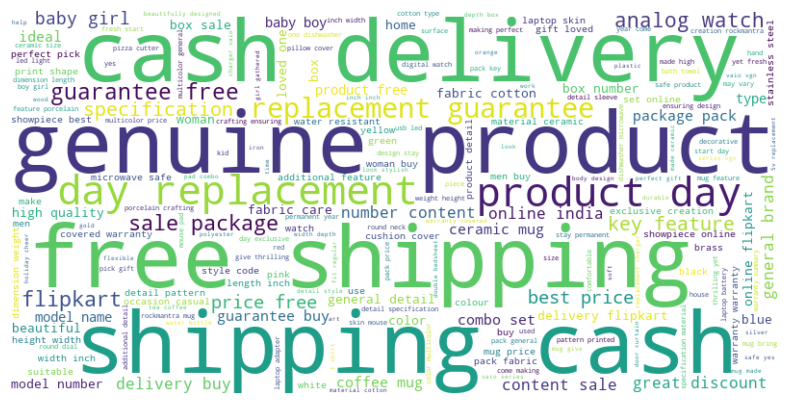

In [37]:
#variable description
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=400, max_words=200, background_color='white').generate(' '.join(df['des_sentence_bow_lem']))
# Affichage du wordcloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# CountVectorizer et Tf-idf

## La variable description

In [33]:
# création du bag of words (CountVectorizer et Tf-idf)(variable description)

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

cvect = CountVectorizer(stop_words='english', max_df=1, min_df=1)
ctf = TfidfVectorizer(stop_words='english', max_df=1, min_df=1)
# vectorisation variable description (tokenisation, stopswords,lower,lemmatisation) 
feat = 'des_sentence_bow_lem'
cv_fit = cvect.fit(df[feat])
ctf_fit = ctf.fit(df[feat])

cv_transform = cvect.transform(df[feat])  
ctf_transform = ctf.transform(df[feat]) 

In [34]:
# vectorisation variable product_name (tokenisation, stopswords,lower,lemmatisation) 
feat = 'name_sentence_bow_lem'
cv_fit1 = cvect.fit(df[feat])
ctf_fit1 = ctf.fit(df[feat])

cv_transform_name = cvect.transform(df[feat])  
ctf_transform_name = ctf.transform(df[feat]) 

### reduction de dimensions et affichage 

In [35]:
# t-SNE 
tsne = TSNE(n_components=2,perplexity=60 , random_state=42) 

# Application t-SNE sur les vecteurs transformés
cv_tsne_result = tsne.fit_transform(cv_transform.toarray())
ctf_tsne_result = tsne.fit_transform(ctf_transform.toarray())


In [36]:
df_tsne=pd.DataFrame(cv_tsne_result)
df_tsne1=pd.DataFrame(ctf_tsne_result)

In [37]:
df_tsne=df_tsne.join(df['category'])
df_tsne1=df_tsne1.join(df['category'])

Text(0, 0.5, 'TSNE2')

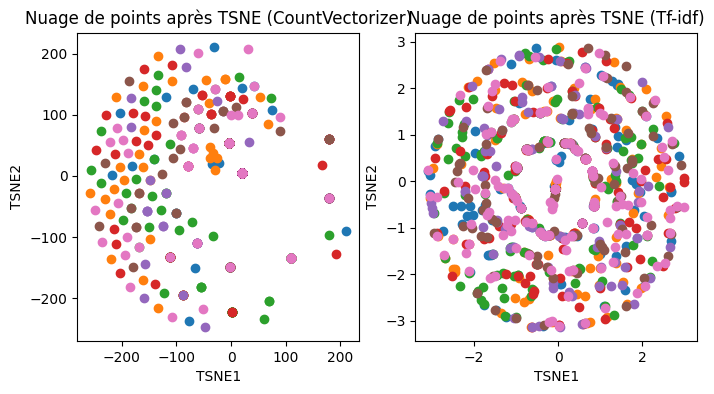

In [38]:
# visualisation des donnees
plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
for category in df_tsne['category'].unique():
    subset = df_tsne[df_tsne['category'] == category]
    plt.scatter(subset[0], subset[1], label=category)

plt.title('Nuage de points après TSNE (CountVectorizer)')
plt.xlabel('TSNE1')
plt.ylabel('TSNE2')
#plt.legend(loc='upper left')
plt.subplot(1, 2, 2)
for category in df_tsne1['category'].unique():
    subset = df_tsne1[df_tsne1['category'] == category]
    plt.scatter(subset[0], subset[1], label=category)

plt.title('Nuage de points après TSNE (Tf-idf)')
plt.xlabel('TSNE1')
plt.ylabel('TSNE2')
#plt.legend(loc='upper left')

In [39]:
from sklearn.cluster import KMeans

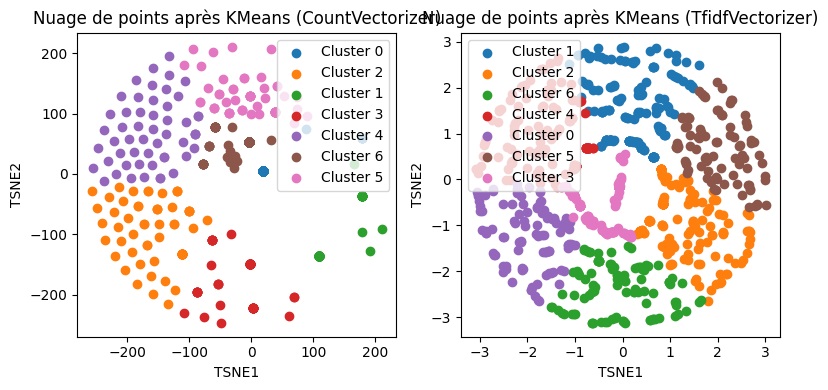

In [40]:
#  KMeans
kmeans_cv = KMeans(n_clusters=7,n_init='auto') 
kmeans_ctf = KMeans(n_clusters=7,n_init='auto')
# clustering Kmeans( CountVectorizer)
cv_clusters = kmeans_cv.fit_predict(cv_tsne_result)
# ClusteringKmeans avec TfidfVectorizer
ctf_clusters = kmeans_ctf.fit_predict(ctf_tsne_result)

# Création DataFrame pour la visualisation
df_cv_clusters = pd.DataFrame(data=cv_tsne_result, columns=['TSNE1', 'TSNE2'])
df_ctf_clusters = pd.DataFrame(data=ctf_tsne_result, columns=['TSNE1', 'TSNE2'])

# les clusters
df_cv_clusters['cluster'] = cv_clusters
df_ctf_clusters['cluster'] = ctf_clusters
df_cv_clusters['category'] = df['category']
df_ctf_clusters['category'] = df['category']

# Affichage
plt.figure(figsize=(8, 4))
# avec CountVectorizer
plt.subplot(1, 2, 1)
for cluster in df_cv_clusters['cluster'].unique():
    subset = df_cv_clusters[df_cv_clusters['cluster'] == cluster]
    plt.scatter(subset['TSNE1'], subset['TSNE2'], label=f'Cluster {cluster}')

plt.title('Nuage de points après KMeans (CountVectorizer)')
plt.xlabel('TSNE1')
plt.ylabel('TSNE2')
plt.legend()
# avec TfidfVectorizer
plt.subplot(1, 2, 2)
for cluster in df_ctf_clusters['cluster'].unique():
    subset = df_ctf_clusters[df_ctf_clusters['cluster'] == cluster]
    plt.scatter(subset['TSNE1'], subset['TSNE2'], label=f'Cluster {cluster}')

plt.title('Nuage de points après KMeans (TfidfVectorizer)')
plt.xlabel('TSNE1')
plt.ylabel('TSNE2')
plt.legend()

plt.tight_layout()
plt.show()

In [41]:
# ARI
from sklearn.metrics import adjusted_rand_score

cat = df_cv_clusters['category'].values
clust = df_cv_clusters['cluster']
cat_ctf = df_ctf_clusters['category'].values
clust_ctf = df_ctf_clusters['cluster']

# Calcul de l'ARI
ari = adjusted_rand_score(cat, clust)
ari_ctf = adjusted_rand_score(cat_ctf, clust_ctf)
# Affichage de l'ARI
print("ARI:", ari)
print("ARI:", ari_ctf)


ARI: 0.03739603766633586
ARI: 0.010376076144856106


## la  variable product_name

In [71]:
# Utilisez t-SNE pour réduire les dimensions
tsne = TSNE(n_components=2,perplexity=62 , random_state=42) # (n_components=2, perplexity=YOUR_PERPLEXITY, random_state=42)

# Appliquer t-SNE sur les vecteurs transformés
cv_tsne_name_result = tsne.fit_transform(cv_transform_name.toarray())
ctf_tsne_name_result = tsne.fit_transform(ctf_transform_name.toarray())
df_tsne_name=pd.DataFrame(cv_tsne_name_result)
df_tsne_name1=pd.DataFrame(ctf_tsne_name_result)
df_tsne_name=df_tsne_name.join(df['category'])
df_tsne_name1=df_tsne_name1.join(df['category'])

Text(0, 0.5, 'tsne2')

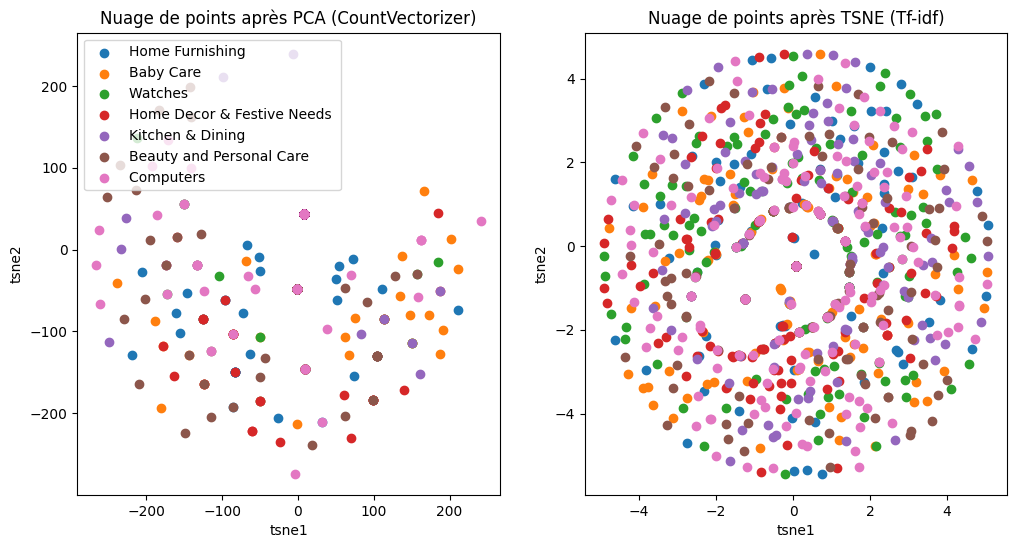

In [78]:
# Afficher les nuages de points avec la coloration par catégorie
df_tsne_name=pd.DataFrame(cv_tsne_name_result)
df_tsne_name['category']=df['category']
df_ctf_tsne_name=pd.DataFrame(ctf_tsne_name_result)
df_ctf_tsne_name['category']=df['category']

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
for category in df_tsne_name['category'].unique():
    subset = df_tsne_name[df_tsne_name['category'] == category]
    plt.scatter(subset[0], subset[1], label=category)

plt.title('Nuage de points après TSNE (CountVectorizer)')
plt.xlabel('tsne1')
plt.ylabel('tsne2')
plt.legend(loc='upper left')
plt.subplot(1, 2, 2)
for category in df_ctf_tsne_name['category'].unique():
    subset = df_ctf_tsne_name[df_ctf_tsne_name['category'] == category]
    plt.scatter(subset[0], subset[1], label=category)

plt.title('Nuage de points après TSNE (Tf-idf)')
plt.xlabel('tsne1')
plt.ylabel('tsne2')
#plt.legend(loc='upper left')

C:\Users\VORPC\datascientist\projet6\env\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\VORPC\datascientist\projet6\env\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


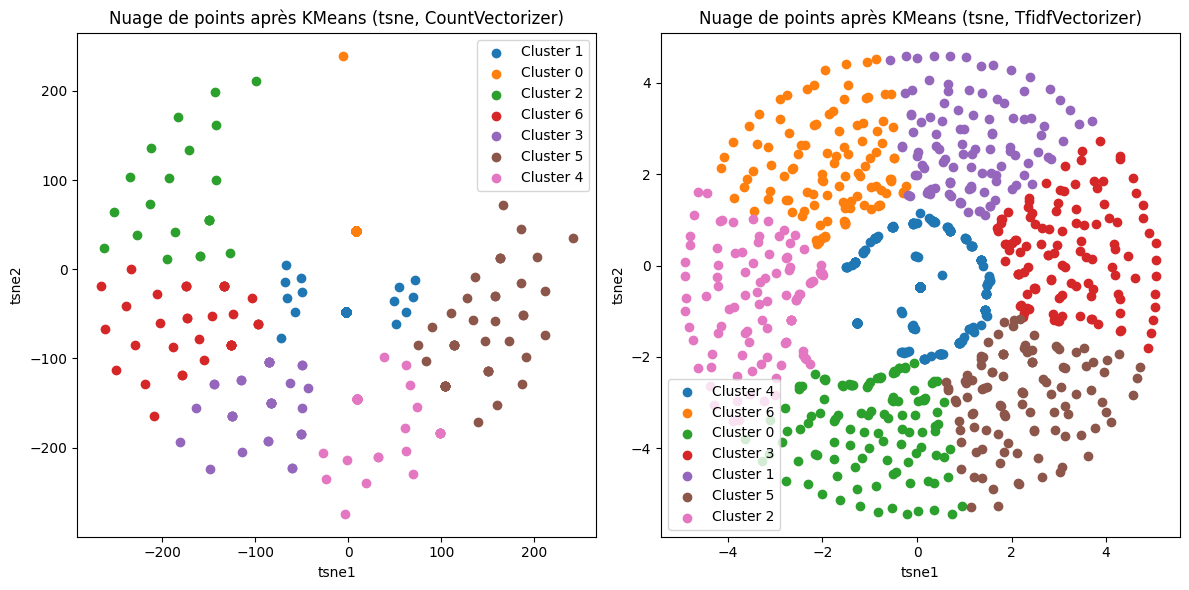

In [80]:
# Appliquer KMeans sur les résultats de t-SNE
kmeans_cv = KMeans(n_clusters=7) 
kmeans_ctf = KMeans(n_clusters=7)

cv_clusters = kmeans_cv.fit_predict(cv_tsne_name_result)
ctf_clusters = kmeans_ctf.fit_predict(ctf_tsne_name_result)

# Créer un DataFrame pour faciliter la visualisation
df_cv_clusters = pd.DataFrame(data=cv_tsne_name_result, columns=['tsne1', 'tsne2'])
df_ctf_clusters = pd.DataFrame(data=ctf_tsne_name_result, columns=['tsne1', 'tsne2'])
df_ctf_clusters['category']=df['category']
df_cv_clusters['category']=df['category']
# Ajouter les résultats du clustering au DataFrame
df_cv_clusters['cluster'] = cv_clusters
df_ctf_clusters['cluster'] = ctf_clusters

# Afficher les nuages de points avec la coloration par cluster
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
for cluster in df_cv_clusters['cluster'].unique():
    subset = df_cv_clusters[df_cv_clusters['cluster'] == cluster]
    plt.scatter(subset['tsne1'], subset['tsne2'], label=f'Cluster {cluster}')

plt.title('Nuage de points après KMeans (tsne, CountVectorizer)')
plt.xlabel('tsne1')
plt.ylabel('tsne2')
plt.legend()

plt.subplot(1, 2, 2)
for cluster in df_ctf_clusters['cluster'].unique():
    subset = df_ctf_clusters[df_ctf_clusters['cluster'] == cluster]
    plt.scatter(subset['tsne1'], subset['tsne2'], label=f'Cluster {cluster}')

plt.title('Nuage de points après KMeans (tsne, TfidfVectorizer)')
plt.xlabel('tsne1')
plt.ylabel('tsne2')
plt.legend()

plt.tight_layout()
plt.show()

In [81]:
 #utiliser product category 
from sklearn.metrics import adjusted_rand_score

cat = df_ctf_clusters['category']
clust = df_ctf_clusters['cluster']

cat1 = df_cv_clusters['category']
clust1 = df_cv_clusters['cluster']

# Calcul de l'ARI
ari = adjusted_rand_score(cat, clust)
ari1 = adjusted_rand_score(cat1, clust1)
# Affichage de l'ARI
print("ARI:", ari)
print("ARI:", ari1)

ARI: 0.013232937085107564
ARI: 0.02290878073263921


# Word2vec

In [84]:
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize

## La variable description 

In [85]:
model_w2v = Word2Vec(sentences=df['des_sentence_bow_lem'], vector_size=100, window=5, sg=0, min_count=1)
# entrainement 
model_w2v.train(df['des_sentence_bow_lem'], total_examples=model_w2v.corpus_count, epochs=10)
# Vecteurs de Description de chaque mot
df['description_vectors'] = df['des_sentence_bow_lem'].apply(lambda tokens: [model_w2v.wv[word] for word in tokens if word in model_w2v.wv])
#  creation vecteur unique pour chaque  description 
df['description_avg_vector'] = df['description_vectors'].apply(lambda vectors: sum(vectors) / len(vectors) if vectors else None)


In [86]:
# Filtrer les lignes avec des vecteurs non nuls
df_filtered = df.dropna(subset=['description_avg_vector'])

# vecteurs moyens
X = np.array(df_filtered['description_avg_vector'].to_list())  # Convertir en tableau NumPy

# t-SNE 
tsne = TSNE(n_components=2, random_state=42)
tsne_result = tsne.fit_transform(X)

# Création DataFrame 
df_tsne = pd.DataFrame(tsne_result, columns=['TSNE1', 'TSNE2'])
df_tsne['category']=df_filtered['category']


In [95]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=7, random_state=42,n_init='auto')
df['cluster_w2v'] = kmeans.fit_predict(df['description_avg_vector'].dropna().to_list())

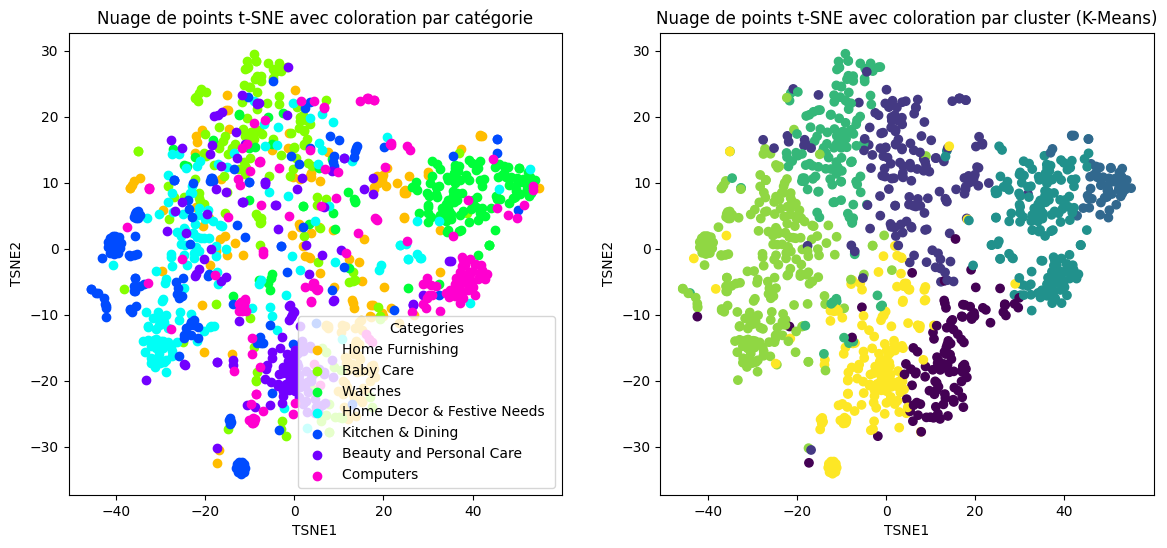

In [88]:
import seaborn as sns
# palette
palette = sns.color_palette("hsv", len(df_tsne['category'].unique()))

# Affichage avec coloration par catégorie
plt.figure(figsize=(14, 6))
plt.subplot(1,2,1)
for i, category in enumerate(df_tsne['category'].unique()):
    subset = df_tsne[df_tsne['category'] == category]
    plt.scatter(subset['TSNE1'], subset['TSNE2'], label=category, color=palette[i])

# Ajouter la légende
plt.legend(title='Categories')

plt.title('Nuage de points t-SNE avec coloration par catégorie')
plt.xlabel('TSNE1')
plt.ylabel('TSNE2')
#####
plt.subplot(1,2,2)
plt.scatter(df_tsne['TSNE1'], df_tsne['TSNE2'], c=df['cluster_w2v'])
plt.title('Nuage de points t-SNE avec coloration par cluster (K-Means)')
plt.xlabel('TSNE1')
plt.ylabel('TSNE2')
plt.show()

In [89]:
from sklearn.metrics import adjusted_rand_score

cat = df['category']
clust = df['cluster_w2v']

# Calcul de l'ARI
ari = adjusted_rand_score(cat, clust)

# Affichage de l'ARI
print("ARI:", ari)

ARI: 0.17286756286192806


## la variable product_name

In [90]:

model_w2v = Word2Vec(sentences=df['name_sentence_bow_lem'], vector_size=100, window=5, sg=0, min_count=1)
# entrainement 
model_w2v.train(df['name_sentence_bow_lem'], total_examples=model_w2v.corpus_count, epochs=10)
# Vecteurs de Description de chaque mot
df['name_vectors'] = df['name_sentence_bow_lem'].apply(lambda tokens: [model_w2v.wv[word] for word in tokens if word in model_w2v.wv])
#  creation vecteur unique pour chaque  description 
df['name_avg_vector'] = df['name_vectors'].apply(lambda vectors: sum(vectors) / len(vectors) if vectors else None)


In [91]:
# Filtrer les lignes avec des vecteurs non nuls
df_filtered = df.dropna(subset=['name_avg_vector'])

# vecteurs moyens
X = np.array(df_filtered['name_avg_vector'].to_list())  

# t-SNE: réduction des dimensions à 2
tsne = TSNE(n_components=2, random_state=42)
tsne_result = tsne.fit_transform(X)

# Création DataFrame 
df_tsne = pd.DataFrame(tsne_result, columns=['TSNE1', 'TSNE2'])
df_tsne['category']=df_filtered['category']


In [92]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=7, random_state=42,n_init='auto')
df['cluster_w2v_name'] = kmeans.fit_predict(df['name_avg_vector'].dropna().to_list())

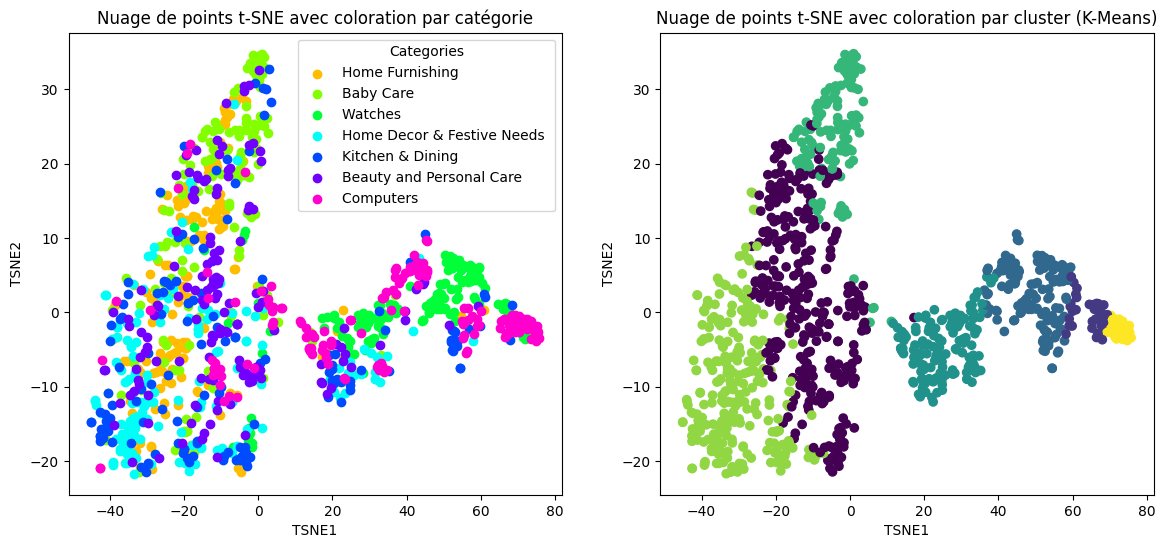

In [93]:
import seaborn as sns
# palette 
palette = sns.color_palette("hsv", len(df_tsne['category'].unique()))
plt.figure(figsize=(14, 6))
plt.subplot(1,2,1)
# Affichage avec coloration par catégorie

for i, category in enumerate(df_tsne['category'].unique()):
    subset = df_tsne[df_tsne['category'] == category]
    plt.scatter(subset['TSNE1'], subset['TSNE2'], label=category, color=palette[i])

# Ajouter la légende
plt.legend(title='Categories')

plt.title('Nuage de points t-SNE avec coloration par catégorie')
plt.xlabel('TSNE1')
plt.ylabel('TSNE2')

plt.subplot(1,2,2)
plt.scatter(df_tsne['TSNE1'], df_tsne['TSNE2'], c=df['cluster_w2v_name'])
plt.title('Nuage de points t-SNE avec coloration par cluster (K-Means)')
plt.xlabel('TSNE1')
plt.ylabel('TSNE2')
plt.show()


In [94]:
 #calcul de ari
from sklearn.metrics import adjusted_rand_score

cat = df['category']
clust = df['cluster_w2v_name']

# Calcul de l'ARI
ari = adjusted_rand_score(cat, clust)

# Affichage de l'ARI
print("ARI:", ari)

ARI: 0.11551424923039223


#  bert 


In [96]:
from transformers import BertTokenizer, BertModel
import torch
from sklearn.manifold import TSNE
# Chargement du modèle BERT
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')

## La variable description

In [97]:
# la colonne 'description'

# Tokeniser et encoder les descriptions
tokenized_descriptions = df['des_sentence_dl'].apply(lambda x: tokenizer(x, return_tensors='pt', truncation=True, padding=True))

# les embeddings BERT pour chaque description
bert_embeddings = tokenized_descriptions.apply(lambda x: model(**x)['last_hidden_state'].mean(dim=1).detach().numpy())


In [98]:
# Concaténer les vecteurs d'embedding BERT avec le DataFrame
df_bert = pd.concat([df.reset_index(drop=True), pd.DataFrame(np.vstack(bert_embeddings))], axis=1)

# t-SNE
tsne = TSNE(n_components=2, random_state=42)
# Tsne avec selection des colonnes extraites de bert
tsne_result = tsne.fit_transform(df_bert.iloc[:, -768:])  

# Création DataFrame 
df_tsne_bert = pd.DataFrame(tsne_result, columns=['TSNE1', 'TSNE2'])
df_tsne_bert['category'] = df_bert['category']  


In [99]:
from sklearn.cluster import KMeans

X_tsne_bert = df_tsne_bert[['TSNE1', 'TSNE2']]

# K-Means 
kmeans = KMeans(n_clusters=7, random_state=42)
df_tsne_bert['cluster'] = kmeans.fit_predict(X_tsne_bert)

C:\Users\VORPC\datascientist\projet6\env\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


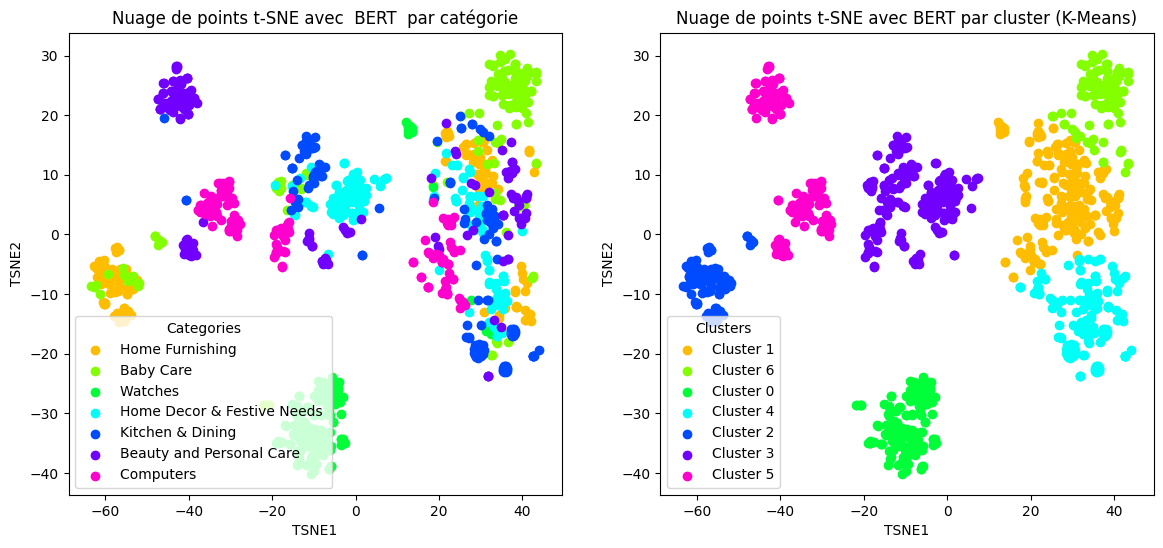

In [100]:
# palette
palette = sns.color_palette("hsv", len(df_tsne_bert['category'].unique()))

# Affichage avec coloration par catégorie
plt.figure(figsize=(14, 6))
plt.subplot(1,2,1)
for i, category in enumerate(df_tsne_bert['category'].unique()):
    subset = df_tsne_bert[df_tsne_bert['category'] == category]
    plt.scatter(subset['TSNE1'], subset['TSNE2'], label=category, color=palette[i])
# Ajouter la légende
plt.legend(title='Categories')
plt.title('Nuage de points t-SNE avec  BERT  par catégorie')
plt.xlabel('TSNE1')
plt.ylabel('TSNE2')


plt.subplot(1,2,2)
# palette 
cluster_palette = sns.color_palette("hsv", len(df_tsne_bert['cluster'].unique()))

# Affichage par cluster
for i, cluster in enumerate(df_tsne_bert['cluster'].unique()):
    subset = df_tsne_bert[df_tsne_bert['cluster'] == cluster]
    plt.scatter(subset['TSNE1'], subset['TSNE2'], label=f'Cluster {cluster}', color=cluster_palette[i])

# Ajouter la légende
plt.legend(title='Clusters')

plt.title('Nuage de points t-SNE avec BERT par cluster (K-Means)')
plt.xlabel('TSNE1')
plt.ylabel('TSNE2')
plt.show()

In [101]:
from sklearn.metrics import adjusted_rand_score

cat = df_tsne_bert['category']
clust =df_tsne_bert['cluster']

# Calcul de l'ARI
ari = adjusted_rand_score(cat, clust)

# Affichage de l'ARI
print("ARI:", ari)

ARI: 0.30293910067088753


## La variable product_name

In [102]:
# la colonne 'product_name'

# Tokeniser et encoder les noms 
tokenized_names = df['name_sentence_dl'].apply(lambda x: tokenizer(x, return_tensors='pt', truncation=True, padding=True))

# les embeddings BERT pour chaque description
bert_embeddings_name = tokenized_names.apply(lambda x: model(**x)['last_hidden_state'].mean(dim=1).detach().numpy())


In [103]:
# Concaténer les vecteurs d'embedding BERT avec le DataFrame
df_bert_name = pd.concat([df.reset_index(drop=True), pd.DataFrame(np.vstack(bert_embeddings_name))], axis=1)

#t-SNE 
tsne = TSNE(n_components=2, random_state=42)
tsne_result = tsne.fit_transform(df_bert_name.iloc[:, -768:])  # Sélectionner les colonnes des embeddings BERT

# Création DataFrame 
df_tsne_bert_name = pd.DataFrame(tsne_result, columns=['TSNE1', 'TSNE2'])
df_tsne_bert_name['category'] = df_bert_name['category']  # Ajouter la variable 'category'


In [104]:
from sklearn.cluster import KMeans

X_tsne_bert_name = df_tsne_bert_name[['TSNE1', 'TSNE2']]

# K-Means sur les vecteurs t-SNE
kmeans = KMeans(n_clusters=7, random_state=42)
df_tsne_bert_name['cluster'] = kmeans.fit_predict(X_tsne_bert_name)

C:\Users\VORPC\datascientist\projet6\env\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


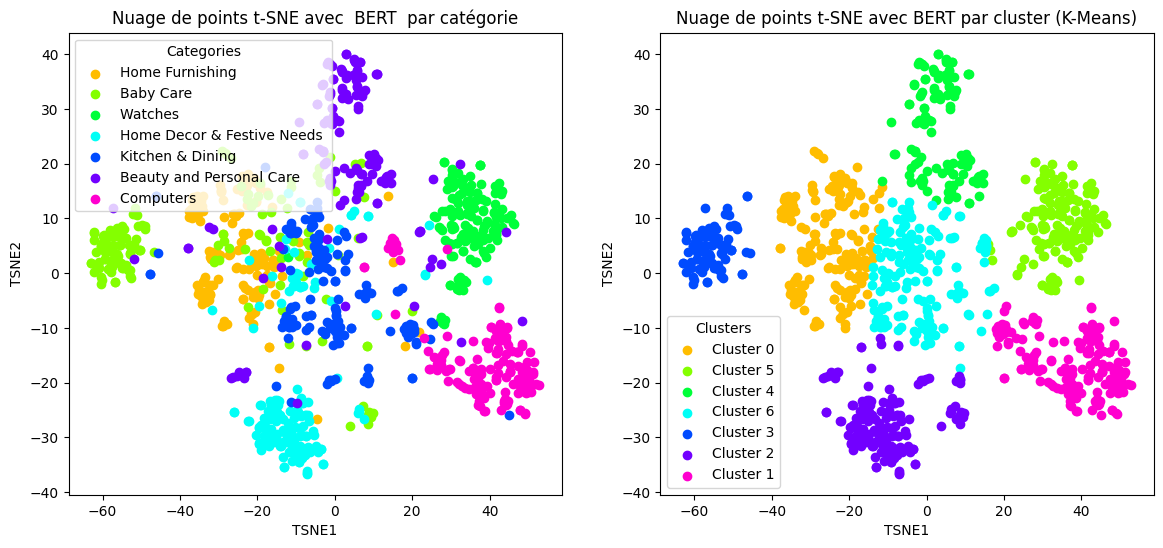

In [105]:
# Utiliser une palette de couleurs de Seaborn
palette = sns.color_palette("hsv", len(df_tsne_bert_name['category'].unique()))

# Affichage par catégorie
plt.figure(figsize=(14, 6))
plt.subplot(1,2,1)
for i, category in enumerate(df_tsne_bert_name['category'].unique()):
    subset = df_tsne_bert_name[df_tsne_bert_name['category'] == category]
    plt.scatter(subset['TSNE1'], subset['TSNE2'], label=category, color=palette[i])
# Ajouter la légende
plt.legend(title='Categories')
plt.title('Nuage de points t-SNE avec  BERT  par catégorie')
plt.xlabel('TSNE1')
plt.ylabel('TSNE2')


plt.subplot(1,2,2)
#palette de couleurs 
cluster_palette = sns.color_palette("hsv", len(df_tsne_bert_name['cluster'].unique()))

# Affichage avec coloration par cluster
for i, cluster in enumerate(df_tsne_bert_name['cluster'].unique()):
    subset = df_tsne_bert_name[df_tsne_bert_name['cluster'] == cluster]
    plt.scatter(subset['TSNE1'], subset['TSNE2'], label=f'Cluster {cluster}', color=cluster_palette[i])

# Ajouter la légende
plt.legend(title='Clusters')

plt.title('Nuage de points t-SNE avec BERT par cluster (K-Means)')
plt.xlabel('TSNE1')
plt.ylabel('TSNE2')
plt.show()

In [106]:
from sklearn.metrics import adjusted_rand_score

cat = df_tsne_bert_name['category']
clust =df_tsne_bert_name['cluster']

# Calcul de l'ARI
ari = adjusted_rand_score(cat, clust)

# Affichage de l'ARI
print("ARI:", ari)

ARI: 0.5803919893812914


# USE

In [1]:
import tensorflow as tf
import tensorflow_hub as hub

# chemin du module TensorFlow Hub USE
module_path = "https://tfhub.dev/google/universal-sentence-encoder/4"

# Chargez le modèle depuis TensorFlow Hub
use_model = hub.load(module_path)

## La variable description

In [34]:
#  la colonne 'description'

# les embeddings USE pour chaque description
use_embeddings = df['des_sentence_dl'].apply(lambda x: use_model([x]).numpy())


In [35]:
# Concaténer les vecteurs d'embedding USE avec le DataFrame
df_use = pd.concat([df.reset_index(drop=True), pd.DataFrame(np.vstack(use_embeddings))], axis=1)

# t-SNE 
tsne = TSNE(n_components=2, random_state=42)
# Sélectionner les colonnes des embeddings USE pour TSne
tsne_result = tsne.fit_transform(df_use.iloc[:, -512:])  
# Création un DataFrame 
df_tsne_use = pd.DataFrame(tsne_result, columns=['TSNE1', 'TSNE2'])
# Ajouter la variable 'category'
df_tsne_use['category'] = df_use['category']  


In [36]:
# K-Means 
kmeans = KMeans(n_clusters=7, random_state=42)
df_tsne_use['cluster'] = kmeans.fit_predict(tsne_result)

C:\Users\VORPC\datascientist\projet6\env\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


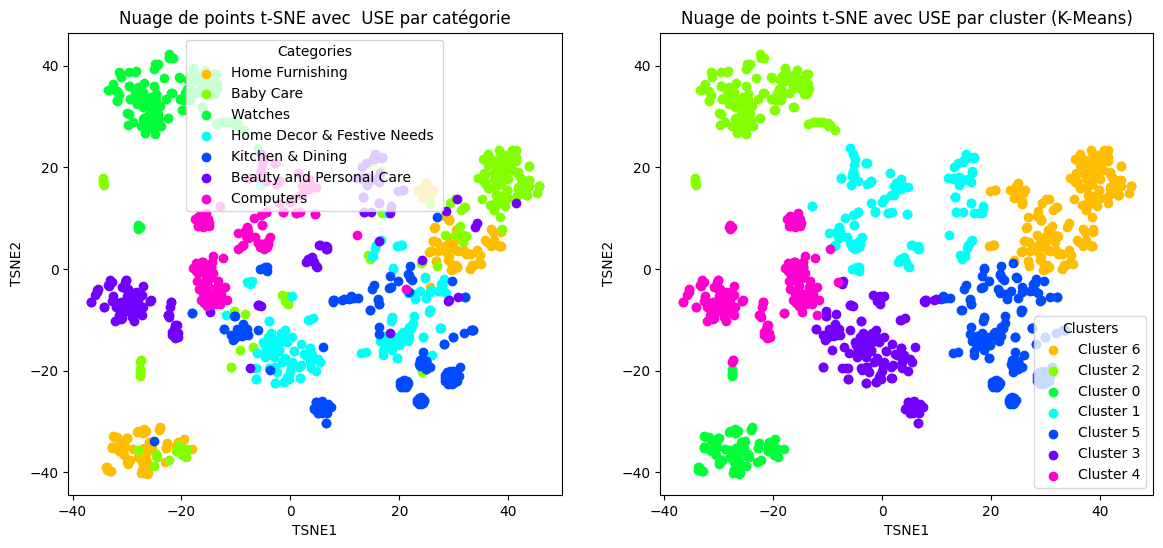

In [37]:
# visualisation 

# une palette de couleurs 
palette = sns.color_palette("hsv", len(df_tsne_use['category'].unique()))

# Affichage avec coloration par catégorie
plt.figure(figsize=(14, 6))
plt.subplot(1,2,1)
for i, category in enumerate(df_tsne_use['category'].unique()):
    subset = df_tsne_use[df_tsne_use['category'] == category]
    plt.scatter(subset['TSNE1'], subset['TSNE2'], label=category, color=palette[i])
# Ajouter la légende
plt.legend(title='Categories')
plt.title('Nuage de points t-SNE avec  USE par catégorie')
plt.xlabel('TSNE1')
plt.ylabel('TSNE2')

plt.subplot(1,2,2)
#  palette de couleurs de Seaborn 
cluster_palette = sns.color_palette("hsv", len(df_tsne_use['cluster'].unique()))

# Affichage avec coloration par cluster
for i, cluster in enumerate(df_tsne_use['cluster'].unique()):
    subset = df_tsne_use[df_tsne_use['cluster'] == cluster]
    plt.scatter(subset['TSNE1'], subset['TSNE2'], label=f'Cluster {cluster}', color=cluster_palette[i])

# Ajouter la légende
plt.legend(title='Clusters')

plt.title('Nuage de points t-SNE avec USE par cluster (K-Means)')
plt.xlabel('TSNE1')
plt.ylabel('TSNE2')
plt.show()



In [38]:
from sklearn.metrics import adjusted_rand_score

cat = df_tsne_use['category']
clust =df_tsne_use['cluster']

# Calcul de l'ARI
ari = adjusted_rand_score(cat, clust)

# Affichage de l'ARI
print("ARI:", ari)

ARI: 0.43658183716649174


In [ ]:
On peut voir clairement une  similarité entre la categoie Watches, et le cluster 2

## la  variable product_name

In [40]:
# les embeddings USE pour chaque nom
use_embeddings_name = df['name_sentence_dl'].apply(lambda x: use_model([x]).numpy())


In [41]:
# Concaténer les vecteurs d'embedding USE avec le DataFrame
df_use_name = pd.concat([df.reset_index(drop=True), pd.DataFrame(np.vstack(use_embeddings_name))], axis=1)

# t-SNE 
tsne = TSNE(n_components=2, random_state=42)
# Sélectionner les colonnes des embeddings USE pour tsne
tsne_result_name = tsne.fit_transform(df_use_name.iloc[:, -512:])  

# Créatio d'un DataFrame 
df_tsne_use_name = pd.DataFrame(tsne_result_name, columns=['TSNE1', 'TSNE2'])
df_tsne_use_name['category'] = df_use_name['category']  

In [42]:
# K-Means sur les vecteurs t-SNE
kmeans = KMeans(n_clusters=7, random_state=42)
df_tsne_use_name['cluster'] = kmeans.fit_predict(tsne_result_name)

C:\Users\VORPC\datascientist\projet6\env\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


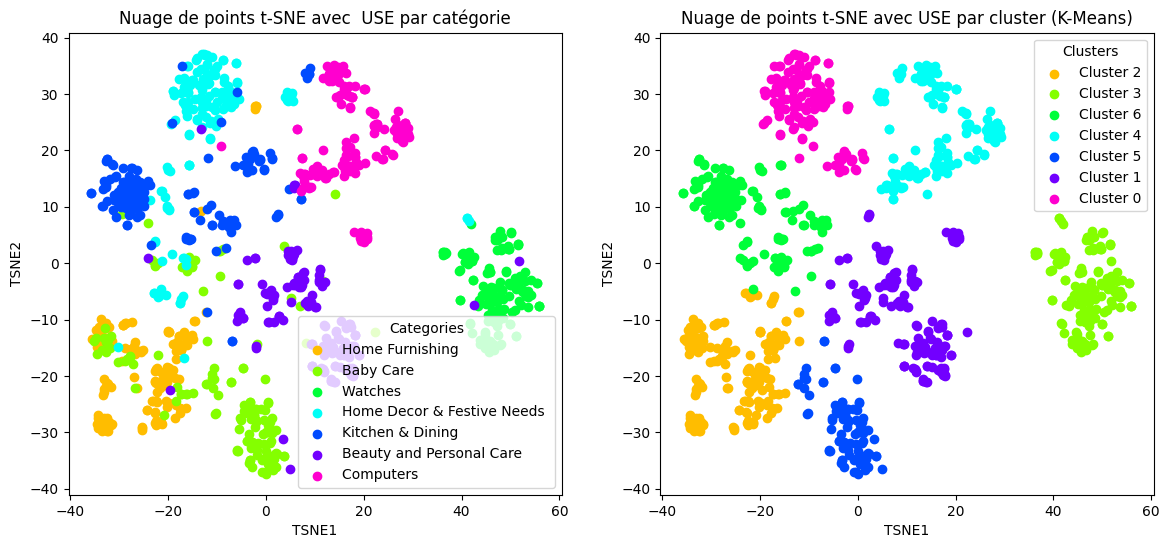

In [43]:
# visualisation 

# palette de couleurs de Seaborn
palette = sns.color_palette("hsv", len(df_tsne_use_name['category'].unique()))

# Affichage avec coloration par catégorie
plt.figure(figsize=(14, 6))
plt.subplot(1,2,1)
for i, category in enumerate(df_tsne_use_name['category'].unique()):
    subset = df_tsne_use_name[df_tsne_use_name['category'] == category]
    plt.scatter(subset['TSNE1'], subset['TSNE2'], label=category, color=palette[i])
# Ajouter la légende
plt.legend(title='Categories')
plt.title('Nuage de points t-SNE avec  USE par catégorie')
plt.xlabel('TSNE1')
plt.ylabel('TSNE2')

plt.subplot(1,2,2)
# palette  de Seaborn
cluster_palette = sns.color_palette("hsv", len(df_tsne_use_name['cluster'].unique()))

# Affichage avec coloration par cluster
for i, cluster in enumerate(df_tsne_use_name['cluster'].unique()):
    subset = df_tsne_use_name[df_tsne_use_name['cluster'] == cluster]
    plt.scatter(subset['TSNE1'], subset['TSNE2'], label=f'Cluster {cluster}', color=cluster_palette[i])

# Ajouter la légende
plt.legend(title='Clusters')

plt.title('Nuage de points t-SNE avec USE par cluster (K-Means)')
plt.xlabel('TSNE1')
plt.ylabel('TSNE2')
plt.show()

In [44]:
 #ARI
from sklearn.metrics import adjusted_rand_score

cat = df_tsne_use_name['category']
clust =df_tsne_use_name['cluster']

# Calcul de l'ARI
ari = adjusted_rand_score(cat, clust)

# Affichage de l'ARI
print("ARI:", ari)

ARI: 0.672976349133529


# Le deux variables product_name  + description 

## USE

In [45]:
use_embeddings_des_name = df['des_name'].apply(lambda x: use_model([x]).numpy())

In [46]:
# Concaténer les vecteurs d'embedding USE avec le DataFrame
df_use_des_name = pd.concat([df.reset_index(drop=True), pd.DataFrame(np.vstack(use_embeddings_des_name))], axis=1)

# t-SNE 
tsne = TSNE(n_components=2, random_state=42)
# Sélectionner les colonnes des embeddings USE pour tsne
tsne_result_des_name = tsne.fit_transform(df_use_des_name.iloc[:, -512:])  

# Créatio d'un DataFrame 
df_tsne_use_des_name = pd.DataFrame(tsne_result_des_name, columns=['TSNE1', 'TSNE2'])
df_tsne_use_des_name['category'] = df_use_des_name['category']  

In [47]:
# K-Means sur les vecteurs t-SNE
kmeans = KMeans(n_clusters=7, random_state=42)
df_tsne_use_des_name['cluster'] = kmeans.fit_predict(tsne_result_des_name)

C:\Users\VORPC\datascientist\projet6\env\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


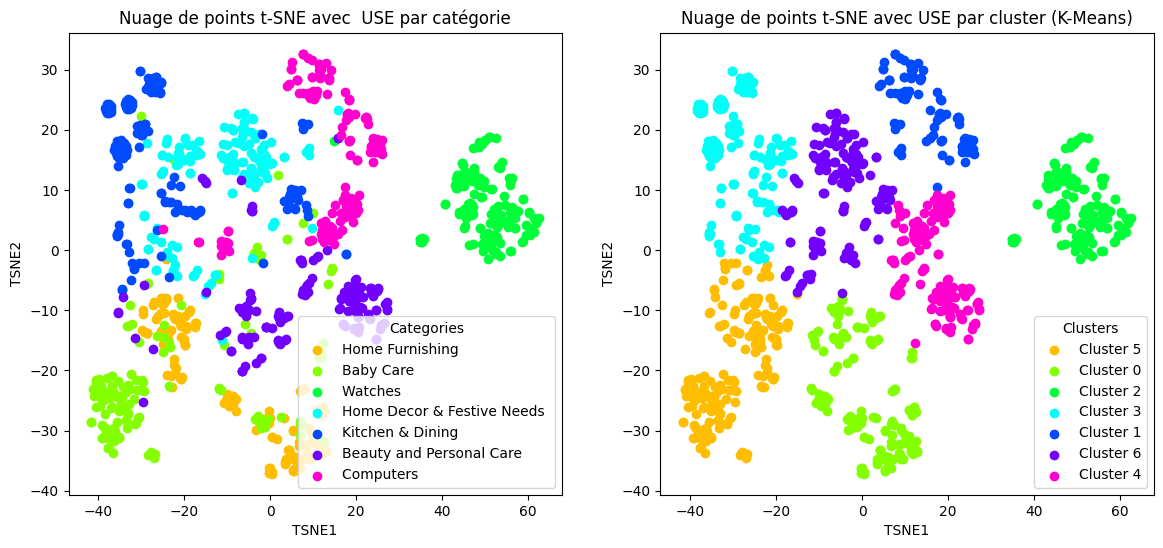

In [49]:
# visualisation 

# palette de couleurs de Seaborn
palette = sns.color_palette("hsv", len(df_tsne_use_des_name['category'].unique()))

# Affichage avec coloration par catégorie
plt.figure(figsize=(14, 6))
plt.subplot(1,2,1)
for i, category in enumerate(df_tsne_use_des_name['category'].unique()):
    subset = df_tsne_use_des_name[df_tsne_use_des_name['category'] == category]
    plt.scatter(subset['TSNE1'], subset['TSNE2'], label=category, color=palette[i])
# Ajouter la légende
plt.legend(title='Categories')
plt.title('Nuage de points t-SNE avec  USE par catégorie')
plt.xlabel('TSNE1')
plt.ylabel('TSNE2')

plt.subplot(1,2,2)
# palette  de Seaborn
cluster_palette = sns.color_palette("hsv", len(df_tsne_use_des_name['cluster'].unique()))

# Affichage avec coloration par cluster
for i, cluster in enumerate(df_tsne_use_des_name['cluster'].unique()):
    subset = df_tsne_use_des_name[df_tsne_use_des_name['cluster'] == cluster]
    plt.scatter(subset['TSNE1'], subset['TSNE2'], label=f'Cluster {cluster}', color=cluster_palette[i])

# Ajouter la légende
plt.legend(title='Clusters')

plt.title('Nuage de points t-SNE avec USE par cluster (K-Means)')
plt.xlabel('TSNE1')
plt.ylabel('TSNE2')
plt.show()

In [50]:
 #ARI
from sklearn.metrics import adjusted_rand_score

cat = df_tsne_use_des_name['category']
clust =df_tsne_use_des_name['cluster']

# Calcul de l'ARI
ari = adjusted_rand_score(cat, clust)

# Affichage de l'ARI
print("ARI:", ari)

ARI: 0.45617051571562994


## Bert

In [93]:

# Tokeniser et encoder les descriptions
tokenized_descriptions = df['des_name'].apply(lambda x: tokenizer(x, return_tensors='pt', truncation=True, padding=True))

# les embeddings BERT pour chaque de_nmae
bert_embeddings_dn = tokenized_descriptions.apply(lambda x: model(**x)['last_hidden_state'].mean(dim=1).detach().numpy())


In [97]:
# Concaténer les vecteurs d'embedding BERT avec le DataFrame
df_bert_dn = pd.concat([df.reset_index(drop=True), pd.DataFrame(np.vstack(bert_embeddings_dn))], axis=1)

# t-SNE
tsne = TSNE(n_components=2, random_state=42)
tsne_result = tsne.fit_transform(df_bert_dn.iloc[:, -768:])  # Sélectionner les colonnes des embeddings BERT

# Dataframe la visualisation
df_tsne_bert_dn = pd.DataFrame(tsne_result, columns=['TSNE1', 'TSNE2'])
df_tsne_bert_dn['category'] = df_bert_name['category']  # Ajouter la variable 'category'

In [98]:
from sklearn.cluster import KMeans

# les colonnes des vecteurs avec t-SNE
X_tsne_bert_dn = df_tsne_bert_dn[['TSNE1', 'TSNE2']]

# K-Means sur les vecteurs t-SNE
kmeans = KMeans(n_clusters=7, random_state=42,n_init='auto')
df_tsne_bert_dn['cluster'] = kmeans.fit_predict(X_tsne_bert_dn)

C:\Users\VORPC\datascientist\projet6\env\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


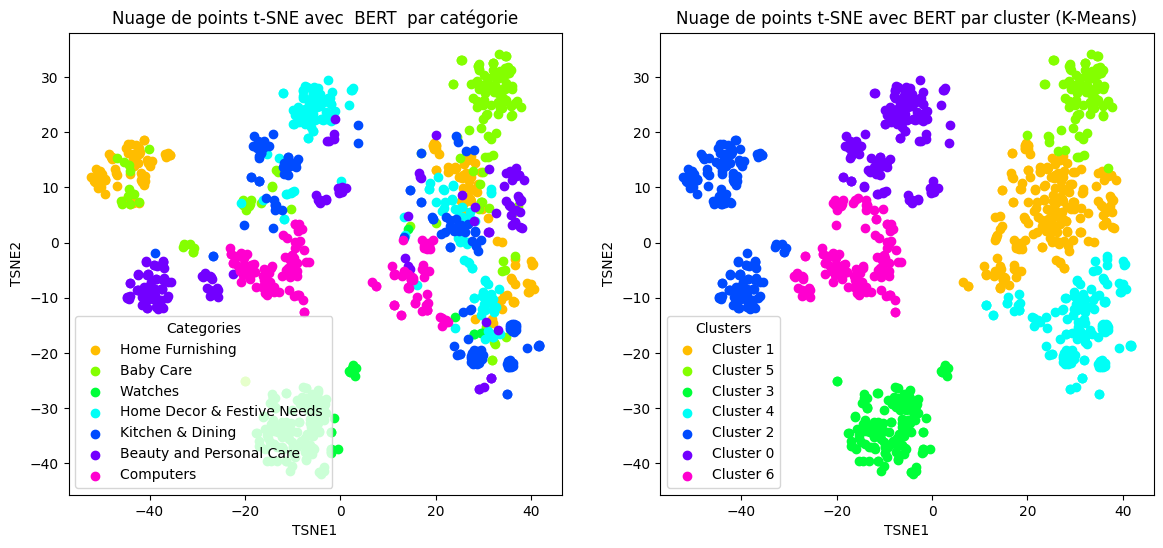

In [100]:
# Utiliser une palette de couleurs de Seaborn
palette = sns.color_palette("hsv", len(df_tsne_bert_dn['category'].unique()))

# Affichage avec coloration par catégorie
plt.figure(figsize=(14, 6))
plt.subplot(1,2,1)
for i, category in enumerate(df_tsne_bert_dn['category'].unique()):
    subset = df_tsne_bert_dn[df_tsne_bert_dn['category'] == category]
    plt.scatter(subset['TSNE1'], subset['TSNE2'], label=category, color=palette[i])
# Ajouter la légende
plt.legend(title='Categories')
plt.title('Nuage de points t-SNE avec  BERT  par catégorie')
plt.xlabel('TSNE1')
plt.ylabel('TSNE2')


plt.subplot(1,2,2)
# la palette de couleurs de Seaborn 
cluster_palette = sns.color_palette("hsv", len(df_tsne_bert_dn['cluster'].unique()))

# Affichage avec coloration par cluster
for i, cluster in enumerate(df_tsne_bert_dn['cluster'].unique()):
    subset = df_tsne_bert_dn[df_tsne_bert_dn['cluster'] == cluster]
    plt.scatter(subset['TSNE1'], subset['TSNE2'], label=f'Cluster {cluster}', color=cluster_palette[i])

# Ajouter la légende
plt.legend(title='Clusters')

plt.title('Nuage de points t-SNE avec BERT par cluster (K-Means)')
plt.xlabel('TSNE1')
plt.ylabel('TSNE2')
plt.show()

In [102]:
 #ARI
from sklearn.metrics import adjusted_rand_score

cat = df_tsne_bert_dn['category']
clust =df_tsne_bert_dn['cluster']

# Calcul de l'ARI
ari = adjusted_rand_score(cat, clust)

# Affichage de l'ARI
print("ARI:", ari)

ARI: 0.3304634224434634


## Word2Vec 

In [43]:

model_w2v = Word2Vec(sentences=df['des_name_trans'], vector_size=100, window=5, sg=0, min_count=1)
# entrainement 
model_w2v.train(df['des_name_trans'], total_examples=model_w2v.corpus_count, epochs=10)
# Vecteurs de Des-name de chaque mot
df['name_vectors_dn_t'] = df['des_name_trans'].apply(lambda tokens: [model_w2v.wv[word] for word in tokens if word in model_w2v.wv])
#  vecteur unique pour chaque  name_des
df['name_avg_vector_dn_t'] = df['name_vectors_dn_t'].apply(lambda vectors: sum(vectors) / len(vectors) if vectors else None)


In [48]:
# Filtrer les lignes avec des vecteurs non nuls
df_filtered_dn = df.dropna(subset=['name_avg_vector_dn_t'])

# les vecteurs moyens
X = np.array(df_filtered_dn['name_avg_vector_dn_t'].to_list())  # Convertir en tableau NumPy

# t-SNE 
tsne_dn = TSNE(n_components=2, random_state=42)
tsne_result_dn = tsne_dn.fit_transform(X)

# Création DataFrame 
df_tsne_dn = pd.DataFrame(tsne_result_dn, columns=['TSNE1', 'TSNE2'])
df_tsne_dn['category']=df_filtered_dn['category']


In [49]:
#clustering avec 
kmeans = KMeans(n_clusters=7, random_state=42)
df['cluster_w2v_name_des'] = kmeans.fit_predict(df['name_avg_vector_dn_t'].dropna().to_list())

C:\Users\VORPC\datascientist\projet6\env\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [52]:
 # ARI
from sklearn.metrics import adjusted_rand_score

cat = df_tsne_dn['category']
clust =df['cluster_w2v_name_des']

# Calcul de l'ARI
ari = adjusted_rand_score(cat, clust)

# Affichage de l'ARI
print("ARI:", ari)

ARI: 0.10989560788915696
